<H1>UK ROAD ACCIDENT DATA ANALYSYS</H1>
<h2>INCLUSIVE YEAR 2019-2022</h2>
<h3>John Benjie Siena</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('accident_data.csv')

In [3]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [4]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown condition')
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unknown weather')

In [5]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [6]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [7]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [8]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [9]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')

In [10]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'],dayfirst=True,errors = 'coerce')

In [11]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [12]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['DayofWeek'] = accident['Accident Date'].dt.dayofweek
accident['Day'] = accident['Accident Date'].dt.day

In [13]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
DayofWeek                  0
Day                        0
dtype: int64

In [14]:
accident['Year'] = accident['Year'].astype('category')
accident['Month'] = accident['Month'].astype('category')
accident['DayofWeek'] = accident['DayofWeek'].astype('category')
accident['Day'] = accident['Day'].astype('category')

In [15]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                             category
Month                            category
DayofWeek                        category
Day                              category
dtype: object

<H1>Insights for year <strong>2019</strong></H1>

In [16]:
accident[accident['Year'] == 2019]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,DayofWeek,Day
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,2,5
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,1,2
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,unknown weather,Taxi/Private hire car,2019,8,0,26
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,4,16
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,unknown weather,Other vehicle,2019,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182110,2.01E+12,Slight,2019-12-20,54.985289,Darkness - no lighting,Dumfries and Galloway,-3.210294,1,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,12,4,20
182111,2.01E+12,Serious,2019-12-21,54.984105,Daylight,Dumfries and Galloway,-3.193693,2,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,12,5,21
182112,2.01E+12,Slight,2019-12-23,55.166369,Darkness - no lighting,Dumfries and Galloway,-2.992068,1,1,Frost or ice,Single carriageway,Rural,Fog or mist,Van / Goods 3.5 tonnes mgw or under,2019,12,0,23
182113,2.01E+12,Slight,2019-12-23,54.995154,Darkness - lights lit,Dumfries and Galloway,-3.058338,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019,12,0,23


In [17]:
year19 = accident[accident['Year'] == 2019]

In [18]:
year19['Accident_Severity'].value_counts()

Accident_Severity
Slight     155079
Serious     24322
Fatal        2714
Name: count, dtype: int64

In [19]:
fatalkind = year19[year19['Accident_Severity'] =='Fatal']

In [20]:
fatalkind['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Rural          1773
Urban           941
Unallocated       0
Name: count, dtype: int64

<H1>1. In year 2019, Rural area has 65.32% fatality rate while only 34.66% happened in urban areas indicating that majority of fatal accidents happened in Rural Area</H1>

In [21]:
rural_v_type = fatalkind[fatalkind['Urban_or_Rural_Area']=='Rural']

In [22]:
rural_v_type['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      1278
Bus or coach (17 or more pass seats)      105
Van / Goods 3.5 tonnes mgw or under        92
Goods 7.5 tonnes mgw and over              74
Motorcycle over 500cc                      71
Motorcycle 125cc and under                 44
Taxi/Private hire car                      28
Motorcycle over 125cc and up to 500cc      21
Goods over 3.5t. and under 7.5t            17
Motorcycle 50cc and under                  15
Other vehicle                              11
Minibus (8 - 16 passenger seats)            8
Agricultural vehicle                        6
Pedal cycle                                 3
Data missing or out of range                0
Ridden horse                                0
Name: count, dtype: int64

In [23]:
dof_type_rural = rural_v_type.groupby(['DayofWeek','Road_Type']).size()

In [24]:
dof_type_rural.unstack()

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road
DayofWeek,,,,,
0,52,0,5,236,3
1,67,3,1,187,0
2,55,0,1,180,2
3,45,0,2,164,4
4,48,0,2,177,2
5,44,0,3,191,1
6,49,1,2,244,2


In [25]:
urban_v_type = fatalkind[fatalkind['Urban_or_Rural_Area']=='Urban']

In [26]:
urban_v_type['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      670
Van / Goods 3.5 tonnes mgw or under       48
Bus or coach (17 or more pass seats)      47
Motorcycle over 500cc                     36
Motorcycle 125cc and under                32
Goods 7.5 tonnes mgw and over             32
Taxi/Private hire car                     22
Motorcycle 50cc and under                 20
Motorcycle over 125cc and up to 500cc     16
Goods over 3.5t. and under 7.5t            9
Other vehicle                              4
Minibus (8 - 16 passenger seats)           3
Pedal cycle                                1
Agricultural vehicle                       1
Data missing or out of range               0
Ridden horse                               0
Name: count, dtype: int64

In [27]:
dof_type = urban_v_type.groupby(['DayofWeek','Road_Type']).size()

In [28]:
dof_type.unstack()

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road
DayofWeek,,,,,
0,23,3,4,72,1
1,26,3,1,98,1
2,28,4,1,97,2
3,25,2,3,99,0
4,30,8,5,90,3
5,31,3,0,109,1
6,34,4,3,126,1


<h1>2. Cars dominate fatalities in both rural (72.1%) and urban (71.2%) areas. </h1>

<h1>3. Motorcycles have a slightly higher fatality share in urban areas, especially smaller-engine ones (e.g., 50cc and under: 2.1% urban vs. 0.8% rural).</h1>

In [29]:
month_weather19 = fatalkind.groupby(['Month','Weather_Conditions']).size()

In [30]:
month_weather19.unstack()

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,unknown weather
Month,,,,,,,,,
1,28,177,0,2,6,24,0,0,2
2,4,128,5,6,3,24,0,1,2
3,2,189,0,2,2,14,0,2,1
4,2,217,2,0,1,5,0,0,4
5,6,194,0,1,4,24,0,0,1
6,0,161,4,4,2,29,0,0,1
7,1,188,0,2,2,31,0,0,1
8,0,224,2,3,1,28,0,0,2
9,2,199,0,3,0,16,0,0,5


<h1>4. Clear weather is the deadliest condition – 76.1% of fatalities happen when the weather is fine with no high winds.</h1>

<h1>5. The months with the most fatalities are August (10.5%) and October (9.9%), indicating potential seasonal risk factors.</h1>

<h1>6. Single carriageways are the deadliest road type in both rural (77.8%) and urban (69.4%) areas.</h1>

<h1>7. Sundays have the highest fatalities in both urban (16.8%) and rural (16.8%) areas.</h1>

In [31]:
f_stats,p_value = f_oneway(year19[year19['Accident_Severity'] == 'Slight']['Number_of_Vehicles'],
                           year19[year19['Accident_Severity'] == 'Serious']['Number_of_Vehicles'],
                           year19[year19['Accident_Severity'] == 'Fatal']['Number_of_Vehicles'])
print(p_value)

4.6385019678479596e-278


<h1>8. There is strong evidence that the number of vehicles involved differs significantly across accident severity categories.</h1>

In [32]:
year19['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     125348
Wet or damp              53153
Frost or ice              2569
Snow                       534
Flood over 3cm. deep       312
unknown condition          199
Name: count, dtype: int64

In [33]:
f_stats,p_value = f_oneway(year19[year19['Road_Surface_Conditions'] == 'Dry']['Number_of_Vehicles'],
                           year19[year19['Road_Surface_Conditions'] == 'Wet or damp']['Number_of_Vehicles'],
                           year19[year19['Road_Surface_Conditions'] == 'Frost or ice']['Number_of_Vehicles'],
                           year19[year19['Road_Surface_Conditions'] == 'Snow']['Number_of_Vehicles'],
                           year19[year19['Road_Surface_Conditions'] == 'Flood over 3cm. deep']['Number_of_Vehicles'],
                           year19[year19['Road_Surface_Conditions'] == 'unknown condition']['Number_of_Vehicles'])
print(p_value)

6.227012773656073e-51


<h1>9. The ANOVA test results indicate that road surface conditions significantly impact the number of vehicles involved in accidents. The extremely low p-value (6.23) suggests that the differences in vehicle involvement across different surface conditions are not due to random chance.</h1>

In [34]:
corr_2k19 = year19['Number_of_Vehicles'].corr(year19['Number_of_Casualties'])

In [35]:
corr_2k19

np.float64(0.2249208856418878)

<h1>10. The correlation between the number of vehicles involved and the number of casualties in accidents for the year 2019 is 0.2249, indicating a weak positive correlation.</h1>

<H1>Insights for year <strong>2020</strong></H1>

In [36]:
accident[accident['Year'] == 2020]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,DayofWeek,Day
182115,200801BS69439,Serious,2020-01-23,51.506812,Darkness - lights lit,Kensington and Chelsea,-0.214677,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2020,1,3,23
182116,200801BS69594,Serious,2020-02-15,51.496323,Daylight,Kensington and Chelsea,-0.170138,1,1,Dry,Dual carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2020,2,5,15
182117,200801BS69698,Serious,2020-02-27,51.502042,Darkness - lights lit,Kensington and Chelsea,-0.190946,1,1,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2020,2,3,27
182118,200801BS69935,Serious,2020-02-25,51.492733,Daylight,Kensington and Chelsea,-0.193763,1,1,Dry,Roundabout,Urban,Fine no high winds,Car,2020,2,1,25
182119,200801BS69938,Serious,2020-02-27,51.493271,Darkness - lights lit,Kensington and Chelsea,-0.199504,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2020,2,3,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352701,2.01E+12,Slight,2020-11-24,55.233969,Darkness - no lighting,Dumfries and Galloway,-3.394276,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Minibus (8 - 16 passenger seats),2020,11,1,24
352702,2.01E+12,Slight,2020-12-06,54.983911,Daylight,Dumfries and Galloway,-3.195094,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2020,12,6,6
352703,2.01E+12,Slight,2020-12-17,55.008072,Darkness - no lighting,Dumfries and Galloway,-3.334825,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2020,12,3,17
352704,2.01E+12,Slight,2020-12-16,54.986388,Daylight,Dumfries and Galloway,-3.180789,1,1,Dry,Single carriageway,Rural,Fine no high winds,Bus or coach (17 or more pass seats),2020,12,2,16


In [37]:
year20 = accident[accident['Year'] == 2020]

In [38]:
year20['Accident_Severity'].value_counts()

Accident_Severity
Slight     145129
Serious     23121
Fatal        2341
Name: count, dtype: int64

In [39]:
year20['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       124552
Darkness - lights lit           33473
Darkness - no lighting          10067
Darkness - lighting unknown      1792
Darkness - lights unlit           707
Name: count, dtype: int64

In [40]:
fatalkind20 = year20[year20['Accident_Severity'] =='Fatal']

In [41]:
fatalkind20['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Rural          1495
Urban           846
Unallocated       0
Name: count, dtype: int64

<h1>11. In 2020, rural areas accounted for 63.87% of fatalities, while urban areas had 36.13%, indicating that the majority of fatal accidents occurred in rural areas.</h1>

In [42]:
fatalkind20['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       1318
Darkness - lights lit           535
Darkness - no lighting          451
Darkness - lighting unknown      21
Darkness - lights unlit          16
Name: count, dtype: int64

In [43]:
daylight2k20 = fatalkind20[fatalkind20['Light_Conditions']== 'Daylight']

In [44]:
daylight2k20['District Area'].value_counts()

District Area
Highland                    18
Leeds                       15
Harborough                  14
East Riding of Yorkshire    14
Birmingham                  13
                            ..
Arun                         0
Amber Valley                 0
Alnwick                      0
Adur                         0
Aberdeen City                0
Name: count, Length: 422, dtype: int64

In [45]:
area_type = daylight2k20.groupby(['District Area','Month']).size()

In [46]:
area_type.unstack().sum()

Month
1      94
2      78
3      91
4     126
5     140
6     123
7     177
8     115
9     106
10    127
11     75
12     66
dtype: int64

In [47]:
area_type.idxmax()

('Highland', np.int32(7))

<h1>12. In 2020, July recorded the highest fatality rate (13.43%) under daylight conditions, suggesting that accidents may peak in the summer, likely due to increased travel. In contrast, December had the lowest rate (5.01%), possibly due to weather conditions encouraging more cautious driving.</h1>

<h1>13. This particularly happens in the month of August specifically in Highland</h1>

In [48]:
corr_2k20 = year20['Number_of_Vehicles'].corr(year20['Number_of_Casualties'])

In [49]:
corr_2k20

np.float64(0.22326073710790043)

<h1>14. The correlation between the number of vehicles involved and the number of casualties in accidents for the year **2020** is 0.2233, indicating a weak positive correlation.</h1>

In [50]:
f_stats,p_value = f_oneway(year20[year20['Accident_Severity'] == 'Slight']['Number_of_Vehicles'],
                           year20[year20['Accident_Severity'] == 'Serious']['Number_of_Vehicles'],
                           year20[year20['Accident_Severity'] == 'Fatal']['Number_of_Vehicles'])
                           
print(p_value)

4.5796594567839236e-281


<h1>15. The ANOVA test reveals a highly significant difference in the number of vehicles involved across various accident severity levels, suggesting a strong relationship between the severity of an accident and the number of vehicles involved.</h1>

In [51]:
accident[accident['Year'] == 2021]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,DayofWeek,Day
352706,200901BS70001,Serious,2021-01-01,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021,1,4,1
352707,200901BS70002,Serious,2021-01-05,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021,1,1,5
352708,200901BS70003,Slight,2021-01-04,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021,1,0,4
352709,200901BS70004,Serious,2021-01-05,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,Urban,Other,Motorcycle over 500cc,2021,1,1,5
352710,200901BS70005,Serious,2021-01-06,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516255,2.01E+12,Serious,2021-12-15,55.072192,Darkness - no lighting,Dumfries and Galloway,-3.297647,1,5,Dry,Dual carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2021,12,2,15
516256,2.01E+12,Serious,2021-12-20,55.008460,Darkness - lights lit,Dumfries and Galloway,-3.088242,1,1,Frost or ice,Slip road,Rural,Fine no high winds,Car,2021,12,0,20
516257,2.01E+12,Slight,2021-12-23,54.995302,Daylight,Dumfries and Galloway,-3.259680,1,1,Frost or ice,Single carriageway,Rural,Snowing + high winds,Motorcycle over 125cc and up to 500cc,2021,12,3,23
516258,2.01E+12,Slight,2021-12-21,55.120172,Darkness - lights lit,Dumfries and Galloway,-3.356438,1,2,Frost or ice,Single carriageway,Rural,Other,Car,2021,12,1,21


In [52]:
year21 = accident[accident['Year'] == 2021]

In [53]:
year21['Accident_Severity'].value_counts()

Accident_Severity
Slight     139500
Serious     21997
Fatal        2057
Name: count, dtype: int64

In [54]:
fatalkind21 = year21[year21['Accident_Severity'] =='Fatal']

In [55]:
fatalkind21['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Rural          1323
Urban           734
Unallocated       0
Name: count, dtype: int64

<h1>16. In year <strong>2021</strong>, Rural areas account for 64.32% of fatalities, while urban areas make up 35.68%, indicating that the majority of fatal accidents occurred in rural areas. </h1>

In [56]:
accident[accident['Year'] == 2022]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,DayofWeek,Day
516260,201001BS70003,Slight,2022-01-11,51.484087,Daylight,Kensington and Chelsea,-0.164002,1,2,Wet or damp,Single carriageway,Urban,Other,Car,2022,1,1,11
516261,201001BS70004,Slight,2022-01-11,51.509212,Darkness - lights lit,Kensington and Chelsea,-0.195273,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2022,1,1,11
516262,201001BS70006,Slight,2022-01-12,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2022,1,2,12
516263,201001BS70007,Slight,2022-01-02,51.513314,Darkness - lights lit,Kensington and Chelsea,-0.198858,1,2,Dry,Roundabout,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022,1,6,2
516264,201001BS70008,Slight,2022-01-04,51.484361,Darkness - lights lit,Kensington and Chelsea,-0.175802,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2022,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,4,18
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,0,21
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,2,23
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,2,23


In [57]:
year22 = accident[accident['Year'] == 2022]

In [58]:
year22['Accident_Severity'].value_counts()

Accident_Severity
Slight     124093
Serious     18777
Fatal        1549
Name: count, dtype: int64

In [59]:
fatalkind22 = year22[year22['Accident_Severity'] =='Fatal']

In [60]:
fatalkind22['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Rural          1010
Urban           539
Unallocated       0
Name: count, dtype: int64

<h1>17. In year <strong>2022</strong>,Rural areas account for 65.19% of fatalities, while urban areas represent only 34.81%, indicating that the majority of fatal accidents occurred in rural areas.</h1>

In [61]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [62]:
fatalkindall= accident[accident['Accident_Severity'] =='Fatal']

In [63]:
fatalkindall['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Rural          5601
Urban          3060
Unallocated       0
Name: count, dtype: int64

In [64]:
summary1 = fatalkindall.groupby(['Year','Road_Type','Weather_Conditions']).size()

In [65]:
summary1.unstack()

Weather_Conditions       Fine + high winds  Fine no high winds  Fog or mist  \
Year Road_Type                                                                
2019 Dual carriageway                   12                 456           10   
     One way street                      1                  28            0   
     Roundabout                          1                  31            0   
     Single carriageway                 45                1719           18   
     Slip road                           0                  16            0   
2020 Dual carriageway                   11                 385            7   
     One way street                      3                  21            0   
     Roundabout                          1                  33            2   
     Single carriageway                 47                1436           15   
     Slip road                           0                  10            0   
2021 Dual carriageway                    7                 325            2   
     One way street                      1                  20            0   
     Roundabout                          3                  32            1   
     Single carriageway                 30                1283           10   
     Slip road                           0                   2            0   
2022 Dual carriageway                    2                 295            5   
     One way street                      0                  12            0   
     Roundabout                          0                  25            0   
     Single carriageway                 11                 962           12   
     Slip road                           0                   9            0   

Weather_Conditions       Other  Raining + high winds  Raining no high winds  \
Year Road_Type                                                                
2019 Dual carriageway        6                     7                     58   
     One way street          0                     0                      1   
     Roundabout              0                     0                      1   
     Single carriageway     37                    34                    196   
     Slip road               0                     1                      6   
2020 Dual carriageway        8                    21                     52   
     One way street          0                     1                      1   
     Roundabout              0                     1                      1   
     Single carriageway     34                    31                    179   
     Slip road               0                     0                      2   
2021 Dual carriageway       10                     9                     45   
     One way street          1                     0                      3   
     Roundabout              0                     0                      6   
     Single carriageway     35                    29                    164   
     Slip road               2                     0                      1   
2022 Dual carriageway        8                     2                     36   
     One way street          0                     0                      0   
     Roundabout              0                     0                      1   
     Single carriageway     24                     9                     95   
     Slip road               0                     0                      0   

Weather_Conditions       Snowing + high winds  Snowing no high winds  \
Year Road_Type                                                         
2019 Dual carriageway                       0                      0   
     One way street                         0                      0   
     Roundabout                             0                      0   
     Single carriageway                     0                      3   
     Slip road                              0                      0   
2020 Dual carriage

<h1>18.From 2019 to 2022, fatal accidents predominantly occurred on single carriageways and in fine, calm weather conditions in 2019.</h1>

In [66]:
summary2 = fatalkindall.groupby(['Year','Light_Conditions','Road_Surface_Conditions']).size()

In [67]:
summary2.unstack()

Road_Surface_Conditions            Dry  Flood over 3cm. deep  Frost or ice  \
Year Light_Conditions                                                        
2019 Darkness - lighting unknown    13                     0             0   
     Darkness - lights lit         323                     2             5   
     Darkness - lights unlit        10                     0             0   
     Darkness - no lighting        285                     0            12   
     Daylight                     1219                     2            14   
2020 Darkness - lighting unknown    14                     0             0   
     Darkness - lights lit         312                     2            10   
     Darkness - lights unlit         8                     0             0   
     Darkness - no lighting        234                     1            19   
     Daylight                      972                     3            18   
2021 Darkness - lighting unknown     9                     1             1   
     Darkness - lights lit         270                     1            18   
     Darkness - lights unlit         4                     0             0   
     Darkness - no lighting        178                     7            18   
     Daylight                      872                     2            24   
2022 Darkness - lighting unknown     7                     0             0   
     Darkness - lights lit         171                     0            10   
     Darkness - lights unlit         4                     1             0   
     Darkness - no lighting        153                     0            16   
     Daylight                      730                     1            28   

Road_Surface_Conditions           Snow  Wet or damp  unknown condition  
Year Light_Conditions                                                   
2019 Darkness - lighting unknown     0            7                  0  
     Darkness - lights lit           0          229                  0  
     Darkness - lights unlit         0            4                  0  
     Darkness - no lighting          1          214                  0  
     Daylight                        2          372                  0  
2020 Darkness - lighting unknown     0            7                  0  
     Darkness - lights lit           0          211                  0  
     Darkness - lights unlit         0            8                  0  
     Darkness - no lighting          2          195                  0  
     Daylight                        3          321                  1  
2021 Darkness - lighting unknown     0            8                  0  
     Darkness - lights lit           2          184                  0  
     Darkness - lights unlit         0            5                  0  
     Darkness - no lighting          1          165                  0  
     Daylight                        4          283                  0  
2022 Darkness - lighting unknown     0            1                  0  
     Darkness - lights lit           3          107                  0  
     Darkness - lights unlit         0            1                  0  
     Darkness - no lighting          5          106                  0  
     Daylight                       12          192                  1

<h1>19.Between 2019 and 2022, fatal accidents primarily occurred on dry surfaces and under daylight conditions in 2019.</h1>

In [68]:
summary3 = fatalkindall.groupby(['Year','Month','Day']).size()

In [69]:
summary3.unstack()

Day          1   2   3   4   5   6   7   8   9  10  ...  22  23  24  25  26  \
Year Month                                          ...                       
2019 1      11   6   7   6   7   2   5   6   7   8  ...   8   8   3   5  11   
     2       7   9  13  10   5   3  12   3   1   8  ...   5  10   3   8   8   
     3      11  14   8   8   4   7   5   8  10   7  ...   3   6   9   6  10   
     4      10   9   6  13  12   6   5   7   3   2  ...   8   3  13   6   7   
     5       9   7  11  11   7   9   7   8   9   4  ...   8   7   8   8  11   
     6       4   9   8   7   6   4   5   8   8   5  ...   3  13   9  10   5   
     7       5  10   8   4   6   9  13   4   8   6  ...   7   2   7   5   5   
     8      11   7   3   6   8   9   8   9   7  12  ...   7  10  12  14   9   
     9       7   6  12  10   8   6   8  10  13  13  ...  11   9   5   6   2   
     10      7   8   9   5   7  12   5   4   7   5  ...   7   5   5   9   6   
     11      8   9  11   8   7   8   3  10   7   9  ...   4   7   9   6  11   
     12     12   9   6   6  10   9  16   6  10  11  ...   8   6   8   2   3   
2020 1       7   3   3  13   6   7   8  11   9   7  ...   4   6   7   5   4   
     2      12   2   5   4   4   9   4   5  12  11  ...  10   6   7   3   3   
     3      10   8   4   3   7   5   9   2   8   7  ...   8   5   5   6   4   
     4       3   5   7   8  10  10   4   8   0   3  ...   6   7   3   6   9   
     5       6   9  15  11   4   8   6   6   8   4  ...   3   6   3  12   5   
     6       8   4   5  10   1   3   8   5   7   3  ...   7   6   6   7   4   
     7       6   9   7   7   8   9   6   5  10   8  ...   1   5   7  11  13   
     8       9   5   6   5   3   4   4   7  10   6  ...   5  10   5   0   7   
     9       3   3   1  10   9   8  11   8   4   2  ...   5   6  11   4   7   
     10      8   6  10   3   5   3   8  11   7   9  ...   9   7   7  12   6   
     11      3  10  10   5   4  10  10   5   4   8  ...   7   7   5  10   6   
     12      7   9   5   2  10   7   6   3   4  10  ...   9   3   5   6   5   
2021 1       8   2   4   8   5   9   6   8   3   5  ...   7   5   9   8   6   
     2       5   2   2   7   2   6   5   5   3   9  ...   3   5   8   4   3   
     3       7   1   8   3   6   9  10   8   2   2  ...   5   3   4   5   6   
     4       7   5   7   6   7   6   6   9   7   5  ...   5   4   8   8   5   
     5       9   3   8   3   5   4   4   4   8   7  ...   3   9   9   7   6   
     6       3   4   3   6   0  10   4   6   4   3  ...   8   3   8   7   8   
     7       5   7   5  10   5   6   3   4   6   7  ...   4   1   7  16   4   
     8      10  11   5   5   3   5   7  10   4   6  ...   7   4   2   3   4   
     9       3   2   5   3   5   5   5   4   6   8  ...   6   4   6   4   8   
     10      3   6   6   6   8   9   1   5   9   4  ...  10   3   7   5   5   
     11      9   6   4   5   4   5   3   4   5   8  ...   6   5   1   3   5   
     12      5   8   6   6   8   7   7   7   3   3  ...   4   4   4   4   4   
2022 1       3   8   4   1   1   7   1   2   4   1  ...   2   1   4   4   4   
     2       5   7   4   2   7   2   1   2   5   3  ...   9   1   3   4   5   
     3       2   4   5   3   5   5   3   1   8   6  ...   7   5   4   0   8   
     4       4   1   6   3   7   4   2   8   4   4  ...   2   4   4   4   4   
     5       3   2   6   1   1   2   5   7   6   6  ...   9  14   6   5   4   
     6       2   8   7   4   8  11   1   2   4   6  ...   1   2   6   3   5   
     7       2   7   5   7   6   4   3   2   4   5  ...   2   1   4   2   1   
     8       8   3   3   4   6   4   4   7   4   7  ...   7   3   3   4   7   
     9       4   0   7   4   8   5   5   4   8   4  ...   4   6   5   7   6   
     10      3   8   5   4   3   5   7   5   4  10  ...   5   7   6   5   3   
     11      2   7   5   5   6   6   4   9   5   3  ...   4   5   3   1   5   
     12      2   4   2   4   5   3   3   0   3   3  ...   1   5   3   0   6   

Day         27  28  29  30  31  
Year Month      

In [70]:
summary3.max()

np.int64(18)

In [71]:
summary3.idxmax()

(np.int32(2019), np.int32(1), np.int32(27))

<h1>20. The table summarizes fatal accidents on a daily basis from 2019 to 2020, revealing that the highest number of fatalities occurred on January 27, 2019, with a total of 18 accidents.</h1>

In [72]:
summary = fatalkindall.groupby(['Year','Urban_or_Rural_Area']).size()

In [73]:
summary.unstack()

Urban_or_Rural_Area,Rural,Unallocated,Urban
Year,,,
2019,1773,0,941
2020,1495,0,846
2021,1323,0,734
2022,1010,0,539


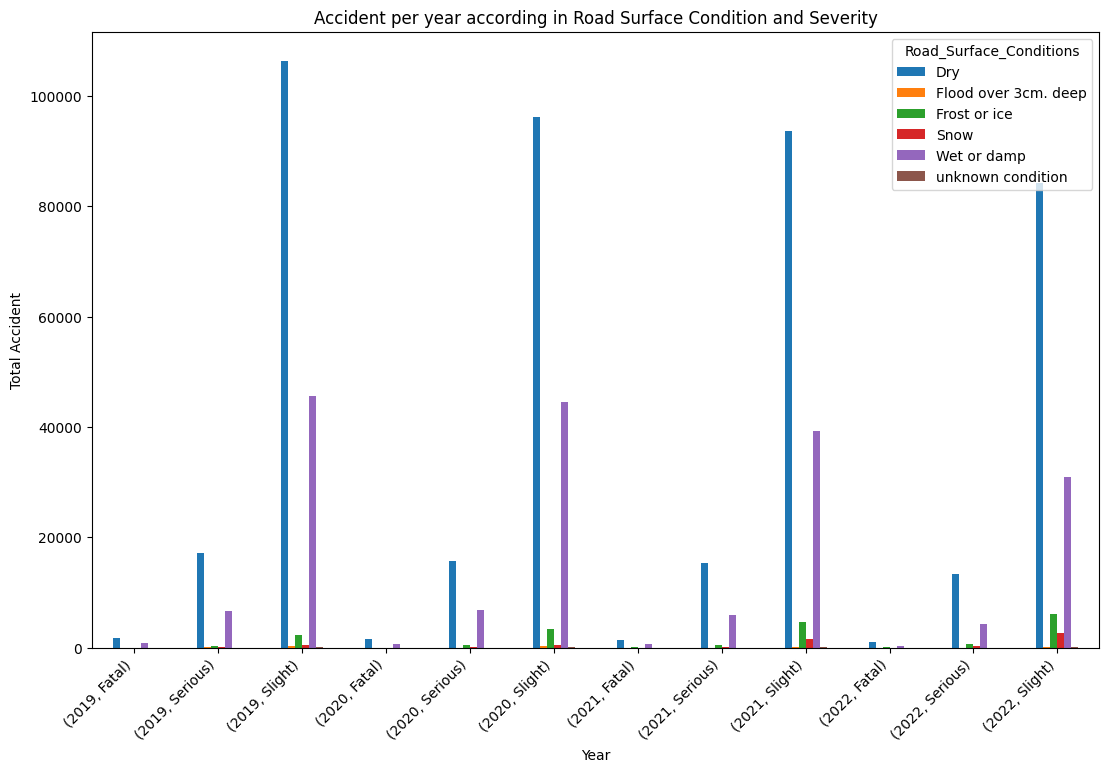

In [117]:
#accident per year according in Road Surface Condition
accident_per_year = accident.groupby(['Year', 'Accident_Severity',"Road_Surface_Conditions"]).size().unstack()

# Data
accident_per_year.plot(kind='bar')
plt.title('Accident per year according in Road Surface Condition and Severity')
plt.xlabel('Year')
plt.ylabel('Total Accident')
plt.xticks(rotation=45, ha='right')
plt.gcf().set_size_inches(13,8)
plt.show()

In [118]:
accident_per_year

Road_Surface_Conditions     Dry  Flood over 3cm. deep  Frost or ice  Snow  \
Year Accident_Severity                                                      
2019 Fatal                 1850                     4            31     3   
     Serious              17181                    54           284    51   
     Slight              106317                   254          2254   480   
2020 Fatal                 1540                     6            47     5   
     Serious              15733                    45           463    71   
     Slight               96233                   280          3360   522   
2021 Fatal                 1333                    11            61     7   
     Serious              15318                    33           557   180   
     Slight               93632                   216          4647  1622   
2022 Fatal                 1065                     2            54    20   
     Serious              13406                    20           703   263   
     Slight               84213                    92          6056  2666   

Road_Surface_Conditions  Wet or damp  unknown condition  
Year Accident_Severity                                   
2019 Fatal                       826                  0  
     Serious                    6734                 18  
     Slight                    45593                181  
2020 Fatal                       742                  1  
     Serious                    6776                 33  
     Slight                    44558                176  
2021 Fatal                       645                  0  
     Serious                    5902                  7  
     Slight                    39238                145  
2022 Fatal                       407                  1  
     Serious                    4373                 12  
     Slight                    30914                152